# House Price prediciton Model

### Importing Important Libraries

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression, Lasso
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.pipeline import Pipeline

### Loading the Dataset

In [ ]:
# Loading the Dataset
data = pd.read_csv('Delhi_v2.csv', encoding="utf-8")

In [36]:
data.head()

,Unnamed: 0,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,NaN,Under Construction,New Property,NaN,NaN,2.0,NaN,Flat,\n\n\n Welcome ...,4148.148148
1,1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,NaN,Ready to Move,New Property,NaN,Semi-Furnished,2.0,NaN,Flat,\n\n\n Mapsko M...,5906.040268
2,2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,NaN,Ready to Move,New Property,1.0,Unfurnished,NaN,NaN,Flat,\n\n\n This pro...,6918.238994
3,3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,NaN,3.0,NaN,Flat,\n\n\n The prop...,4592.592593


### EDA - Exploratory Data Analysis

In [37]:
data.shape

(7738, 18)

In [38]:
data.describe()

,Unnamed: 0,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7738.000000,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,3868.500000,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,2233.912524,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,0.000000,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,1934.250000,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,3868.500000,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,5802.750000,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,7737.000000,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [39]:
data = data.drop(['Unnamed: 0'], axis="columns")

In [40]:
data.describe()

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,parking,Lift,Price_sqft
count,7.738000e+03,7738.000000,7738.000000,7738.000000,7738.000000,7738.000000,5166.000000,2612.000000,1733.000000,7738.000000
mean,8.320635e+06,1409.506591,28.552092,77.273476,2.708193,2.501163,2.426442,7.673047,1.829198,5543.660241
std,7.223197e+06,718.929581,0.107420,0.180606,0.877026,0.867050,1.083677,60.417508,1.192607,2408.659307
min,1.700000e+06,501.000000,28.240023,76.884101,2.000000,2.000000,1.000000,1.000000,0.000000,2100.000000
25%,4.200000e+06,990.000000,28.455539,77.078590,2.000000,2.000000,2.000000,1.000000,1.000000,3950.986915
50%,6.000000e+06,1250.000000,28.574637,77.345320,3.000000,2.000000,2.000000,1.000000,2.000000,4972.674332
75%,9.500000e+06,1650.000000,28.642520,77.421054,3.000000,3.000000,3.000000,2.000000,2.000000,6350.638693
max,8.500000e+07,9500.000000,28.799748,77.688028,10.000000,10.000000,10.000000,1406.000000,10.000000,44378.698225


In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7738 entries, 0 to 7737
Data columns (total 17 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   price             7738 non-null   float64
 1   Address           7738 non-null   object 
 2   area              7738 non-null   float64
 3   latitude          7738 non-null   float64
 4   longitude         7738 non-null   float64
 5   Bedrooms          7738 non-null   float64
 6   Bathrooms         7738 non-null   float64
 7   Balcony           5166 non-null   float64
 8   Status            7164 non-null   object 
 9   neworold          7738 non-null   object 
 10  parking           2612 non-null   float64
 11  Furnished_status  4124 non-null   object 
 12  Lift              1733 non-null   float64
 13  Landmarks         2759 non-null   object 
 14  type_of_building  7738 non-null   object 
 15  desc              7738 non-null   object 
 16  Price_sqft        7738 non-null   float64


In [42]:
data.select_dtypes(include=['object']).count()

,0
Address,7738
Status,7164
neworold,7738
Furnished_status,4124
Landmarks,2759
type_of_building,7738
desc,7738


In [43]:
data.select_dtypes(include=['float64']).count()

,0
price,7738
area,7738
latitude,7738
longitude,7738
Bedrooms,7738
Bathrooms,7738
Balcony,5166
parking,2612
Lift,1733
Price_sqft,7738


#### Checking For missing Values

In [44]:
data.isnull().sum()

,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,2572
Status,574
neworold,0


In [45]:
# data['Balcony'].fillna(0, inplace=True)
# data['Bathrooms'].fillna(0, inplace=True)
# data['Bedrooms'].fillna(0, inplace=True)
data.fillna({'Balcony' : '0', 'Bathrooms' : '0', 'Bedrooms' : '0', 'Lift': '0', 'parking' : '0', 'Landmarks' : 'Unknown', 'Furnished_status' : 'Unknown'}, inplace = True)

In [46]:
data.head()

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
0,5600000.0,"Noida Extension, Noida, Delhi NCR",1350.0,28.608850,77.460560,3.0,3.0,0,Under Construction,New Property,0,Unknown,2.0,Unknown,Flat,\n\n\n Welcome ...,4148.148148
1,8800000.0,"Sector 79, Gurgaon, Delhi NCR",1490.0,28.374236,76.952416,3.0,3.0,0,Ready to Move,New Property,0,Semi-Furnished,2.0,Unknown,Flat,\n\n\n Mapsko M...,5906.040268
2,16500000.0,"Vaishali, Ghaziabad, Delhi NCR",2385.0,28.645769,77.385110,4.0,5.0,0,Ready to Move,New Property,1.0,Unfurnished,0,Unknown,Flat,\n\n\n This pro...,6918.238994
3,3810000.0,"Link Road, F Block, Sector 50, Noida, Uttar Pr...",1050.0,28.566914,77.436434,2.0,2.0,3.0,NaN,New Property,1.0,Unfurnished,2.0,near Gaur Mulberry Mansion,Flat,\n\n\n AIG Roya...,3628.571429
4,6200000.0,"Jaypee Pavilion Court Sector 128, Noida, Secto...",1350.0,28.520732,77.356491,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unknown,3.0,Unknown,Flat,\n\n\n The prop...,4592.592593


In [47]:
data.isnull().sum()

,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,0
Status,574
neworold,0


In [48]:
data.dropna(subset=['Status'], inplace=True)


In [49]:
data.head()
data.shape

(7164, 17)

In [50]:
# 🛠️ Checking for Missing Values
data.isnull().sum()

,0
price,0
Address,0
area,0
latitude,0
longitude,0
Bedrooms,0
Bathrooms,0
Balcony,0
Status,0
neworold,0


In [51]:
data.groupby('Status')['Status'].agg('count')

,Status
Status,
Ready to Move,7148
Under Construction,16


In [52]:
data.sample(5)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft
418,5200000.0,"Sector 89, Faridabad, Sector 89, Faridabad, De...",1585.0,28.416096,77.364810,3.0,3.0,2.0,Ready to Move,Resale,0,Unknown,0,"Near to market,upcoming hospital,",Flat,\n \n \n...,3280.757098
2941,4250000.0,"sector Chi 5, Chi 5, Greater Noida, Delhi NCR",1114.0,28.432094,77.506766,2.0,2.0,2.0,Ready to Move,Resale,0,Semi-Furnished,0,Unknown,Individual House,\n,3815.080790
316,35000000.0,"Sector 50, Noida, Delhi NCR, Sector 50, Noida,...",8500.0,28.571501,77.370003,10.0,7.0,7.0,Ready to Move,Resale,3.0,Semi-Furnished,0,Ramagya School,Individual House,\n\n\n Adorned ...,4117.647059
2010,4450000.0,"NH 24, Ghaziabad, NH 24, Ghaziabad, Delhi NCR",1135.0,28.662880,77.470960,2.0,2.0,3.0,Ready to Move,Resale,1.0,Unknown,2.0,Hospital near by,Flat,\n \n \n...,3920.704846
6651,24000000.0,"Sector 128, Noida, Uttar Pradesh 201304, Sulta...",3475.0,28.529146,77.355843,4.0,4.0,3.0,Ready to Move,Resale,2.0,Unknown,2.0,close to main road.,Flat,\n \n \n...,6906.474820


In [53]:
data['Address'].tail(5)

,Address
7732,"Sector137 Noida Paramount Floraville, Sector 1..."
7733,"Indirapuram, Ghaziabad, Delhi NCR"
7735,"Crossings Republik, Ghaziabad, Delhi NCR"
7736,"Raj Nagar Extension, Ghaziabad, Raj Nagar Exte..."
7737,"sandal apartment, Shalimar Garden Extension 1,..."


## Visualization Of Data

In [54]:
sns.set(style='whitegrid')

fig = plt.figure(figsize=(15,15))

<Figure size 1500x1500 with 0 Axes>

#### Price Distribution

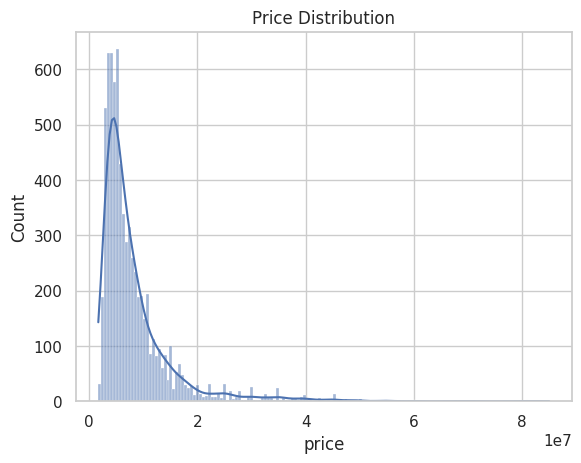

In [55]:
sns.histplot(data=data, x='price', kde=True)
plt.title('Price Distribution')
plt.show()

In [56]:
# Applying Log Transformation on this as this Distribution is left Skewed
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
data['log_price'] = log_transformer.transform(data[['price']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### Area Vs Price plot

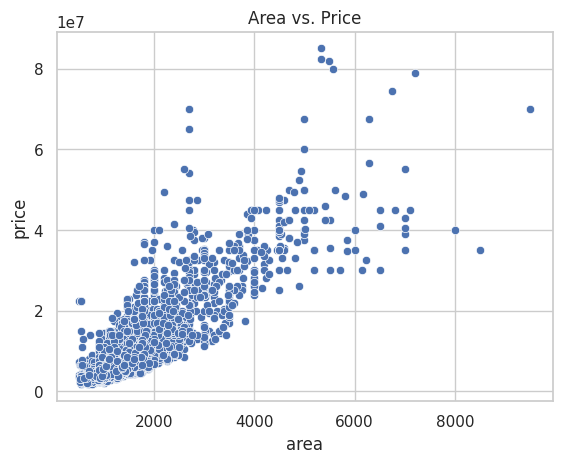

In [57]:
sns.scatterplot(data=data, x='area', y='price')
plt.title('Area vs. Price')
plt.show()

#### Price vs Bedroom Plot

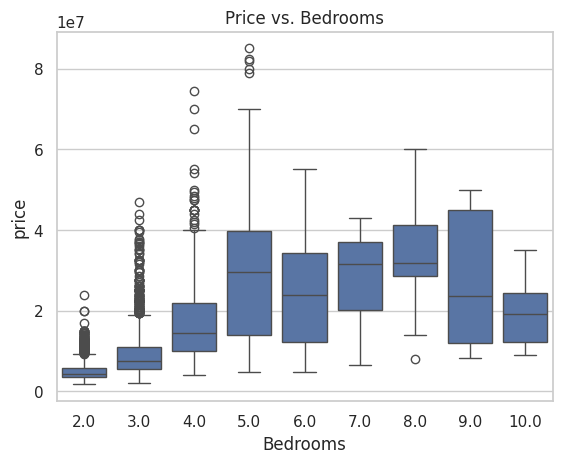

In [58]:
sns.boxplot(data=data, x='Bedrooms', y='price')
plt.title('Price vs. Bedrooms')
plt.show()


#### Price vs Bathroom

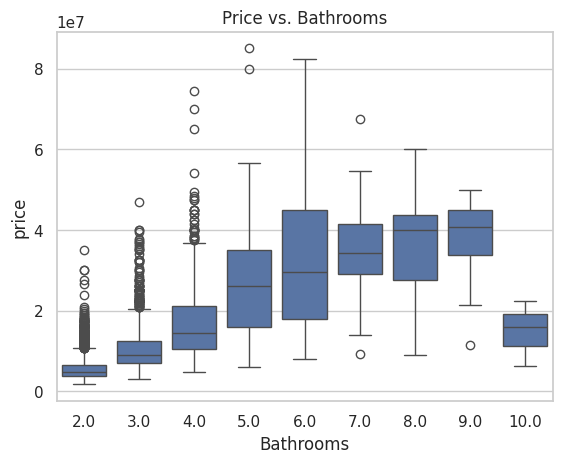

In [59]:
sns.boxplot(data=data, x='Bathrooms', y='price')
plt.title('Price vs. Bathrooms')
plt.show()


#### Price per Sqft Analysis

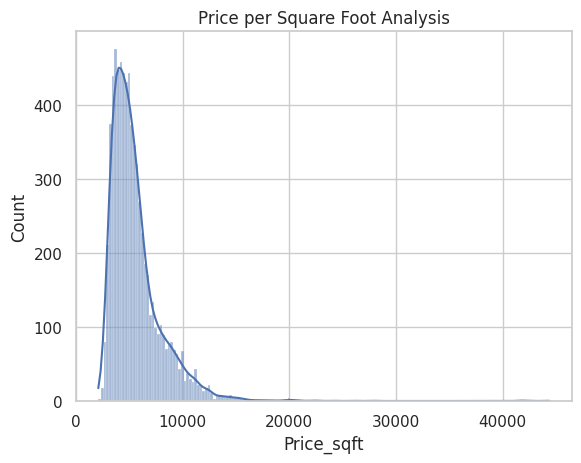

In [60]:
sns.histplot(data=data, x='Price_sqft', kde=True)
plt.title('Price per Square Foot Analysis')
plt.show()

#### Applying Log Transformation

In [61]:
# Applying Log Transformation on this as this Distribution is left Skewed
from sklearn.preprocessing import FunctionTransformer
log_transformer = FunctionTransformer(np.log1p, validate=True)
data['Price_sqft'] = log_transformer.transform(data[['Price_sqft']])


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but FunctionTransformer was fitted without feature names
  warnings.warn(


#### Price per sq ft Analysis

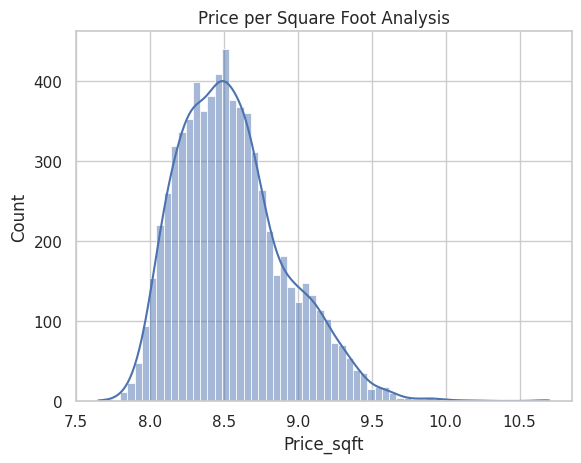

In [62]:
sns.histplot(data=data, x='Price_sqft', kde=True)
plt.title('Price per Square Foot Analysis')
plt.show()

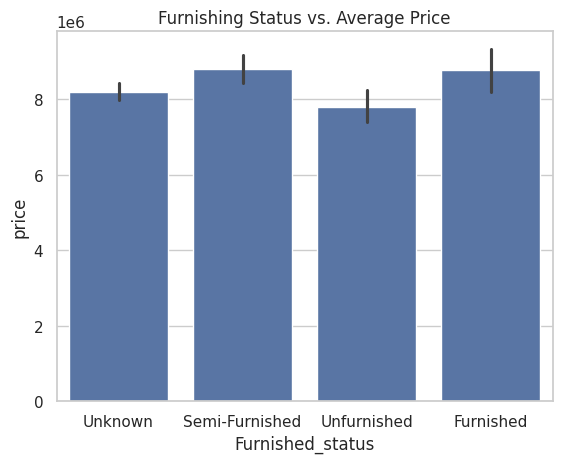

In [63]:
# Furnishing status
sns.barplot(data=data, x='Furnished_status', y='price', estimator='mean')
plt.title('Furnishing Status vs. Average Price')
plt.show()




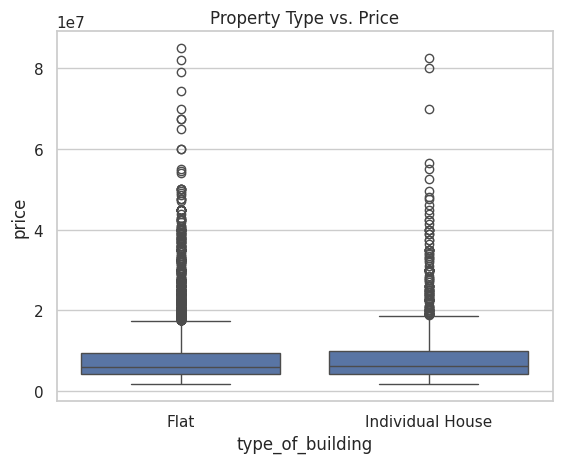

In [64]:
# Property Type vs Price
sns.boxplot(data=data, x='type_of_building', y='price')
plt.title('Property Type vs. Price')
plt.show()


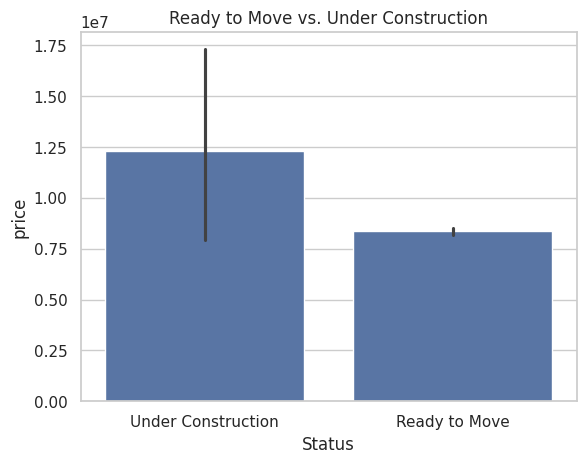

In [65]:
#Status Analysis
sns.barplot(data=data, x='Status', y='price', estimator='mean')
plt.title('Ready to Move vs. Under Construction')
plt.show()


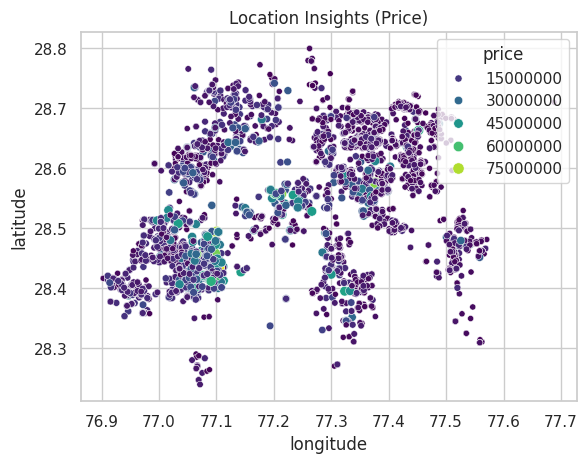

In [66]:
# Location Insight
#ScatterPLot
sns.scatterplot(data=data, x='longitude', y='latitude', hue='price', size='price', palette='viridis')
plt.title('Location Insights (Price)')
plt.show()


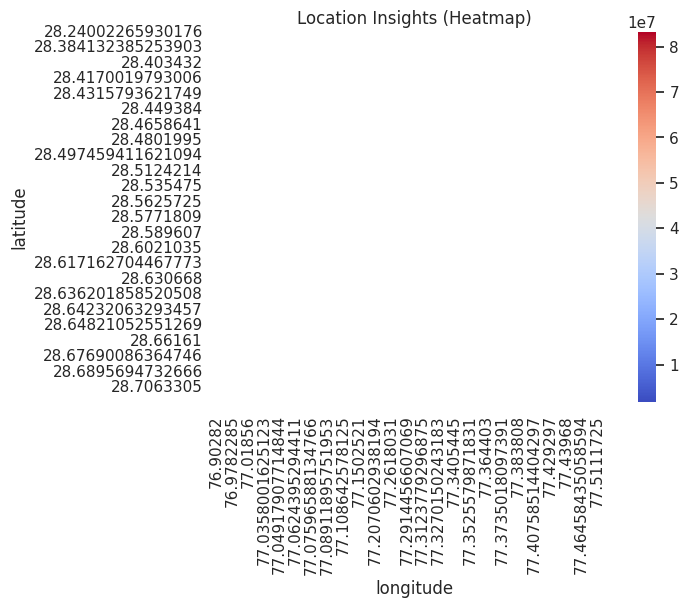

In [67]:
# Heatmap
heatmap_data = data.pivot_table(values='price', index='latitude', columns='longitude')
sns.heatmap(heatmap_data, cmap='coolwarm', linewidths=0.5)
plt.title('Location Insights (Heatmap)')
plt.show()


#### parking Availability vs Average Price

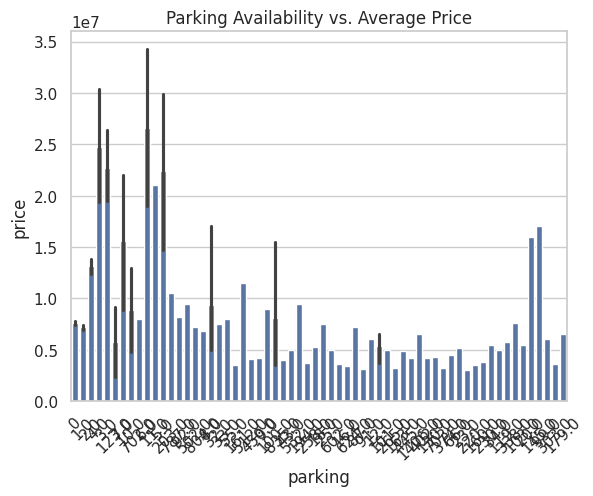

In [68]:
sns.barplot(data=data, x='parking', y='price')
plt.title('Parking Availability vs. Average Price')
plt.xticks(rotation=45)
plt.show()

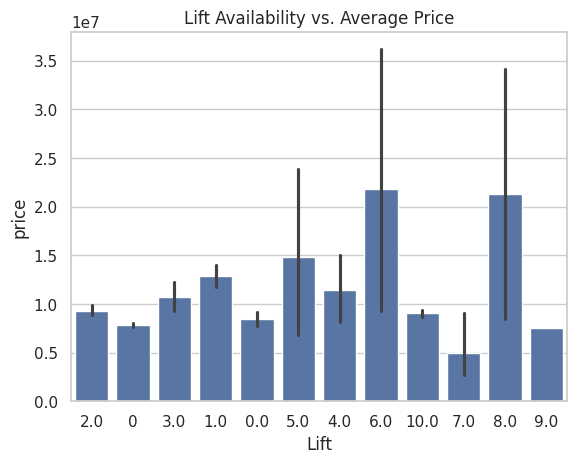

In [69]:
# Lift Availibility
sns.barplot(data=data, x='Lift', y='price', estimator='mean')
plt.title('Lift Availability vs. Average Price')
plt.show()


### Feature Engineering

In [70]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder


# Convert Lift Availability into Yes(1) or No(0)
ohe = OneHotEncoder()
# Convert Furnished > semiFurnished > Unknown > Unfrunished

In [71]:
data.sample(5)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,desc,Price_sqft,log_price
7421,7200000.0,"Sector 143 Greater Noida Delhi NCR, Greater N...",1200.0,28.638044,77.335526,2.0,2.0,2.0,Ready to Move,New Property,1.0,Unfurnished,2.0,Near by Sector 143 noida metro station,Flat,\n\n\n This bra...,8.699681,15.789592
6252,5400000.0,"Kaushambi, Ghaziabad, Delhi NCR",1300.0,28.639064,77.324258,2.0,2.0,0,Ready to Move,Resale,0,Unknown,0,Unknown,Flat,\n \n \n...,8.332031,15.501910
7112,15000000.0,"Sector 74, Gurgaon, Delhi NCR",2018.0,28.416800,77.011827,3.0,3.0,0,Under Construction,New Property,1.0,Unknown,2.0,Unknown,Flat,\n\n\n M3M Skyw...,8.913833,16.523561
941,5500000.0,"Chhattarpur, New Delhi - South, Delhi NCR",1100.0,28.495894,77.185998,3.0,2.0,1.0,Ready to Move,Resale,1.0,Semi-Furnished,0,I P S R College,Flat,\n\n\n Freehold...,8.517393,15.520259
6889,3500000.0,"Sector 75, Faridabad, Sector 75, Faridabad, De...",1160.0,28.390248,77.307136,3.0,2.0,2.0,Ready to Move,Resale,1.0,Unknown,0.0,"Close to Golden Gate, Neharpar, sector 8 and D...",Flat,\n\n\n 3 BHK BP...,8.012430,15.068274


In [72]:
data.drop(columns=['desc'], inplace=True)

In [73]:
data.sample(5)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,Price_sqft,log_price
1783,3500000.0,"NH 24, Ghaziabad, Delhi NCR",1125.0,28.638572,77.430852,3.0,2.0,3.0,Ready to Move,Resale,0,Semi-Furnished,0,Columbia Asia hospital,Flat,8.043057,15.068274
1979,11400000.0,"Sector 70, Gurgaon, Delhi NCR",1830.0,28.397495,77.022815,3.0,3.0,0,Ready to Move,Resale,0,Semi-Furnished,0,Unknown,Flat,8.737213,16.249124
3804,7700000.0,"Sector 37C, Gurgaon, Delhi NCR",1720.0,28.449260,76.984760,3.0,3.0,0,Ready to Move,Resale,0,Unknown,0,Unknown,Flat,8.406875,15.856731
1208,2650000.0,"Raj Nagar Extension, Ghaziabad, Delhi NCR",795.0,28.704053,77.437331,2.0,2.0,0,Ready to Move,Resale,0,Semi-Furnished,0,Unknown,Individual House,8.112028,14.790071
6282,25000000.0,"T -BLOCK, Rajouri Garden, New Delhi - West, De...",1800.0,28.643349,77.120560,3.0,3.0,2.0,Ready to Move,Resale,0,Furnished,0,Unknown,Flat,9.538916,17.034386


In [74]:
# Set display options to show full text
pd.set_option('display.max_colwidth', None)

# Display the column
print(data['Address'])

0                                               Noida Extension, Noida, Delhi NCR
1                                                   Sector 79, Gurgaon, Delhi NCR
2                                                  Vaishali, Ghaziabad, Delhi NCR
4           Jaypee Pavilion Court Sector 128, Noida, Sector 128, Noida, Delhi NCR
5                    tower 2, 6th floor, Crossings Republik, Ghaziabad, Delhi NCR
                                          ...                                    
7732           Sector137 Noida Paramount Floraville, Sector 137, Noida, Delhi NCR
7733                                            Indirapuram, Ghaziabad, Delhi NCR
7735                                     Crossings Republik, Ghaziabad, Delhi NCR
7736    Raj Nagar Extension, Ghaziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR
7737          sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR
Name: Address, Length: 7164, dtype: object


In [75]:
data['Location'] = data['Address'].apply(lambda x: x.split()[-3] if isinstance(x, str) and len(x.split()) > 1 else None)
print(data[['Address', 'Location']])

                                                                        Address  \
0                                             Noida Extension, Noida, Delhi NCR   
1                                                 Sector 79, Gurgaon, Delhi NCR   
2                                                Vaishali, Ghaziabad, Delhi NCR   
4         Jaypee Pavilion Court Sector 128, Noida, Sector 128, Noida, Delhi NCR   
5                  tower 2, 6th floor, Crossings Republik, Ghaziabad, Delhi NCR   
...                                                                         ...   
7732         Sector137 Noida Paramount Floraville, Sector 137, Noida, Delhi NCR   
7733                                          Indirapuram, Ghaziabad, Delhi NCR   
7735                                   Crossings Republik, Ghaziabad, Delhi NCR   
7736  Raj Nagar Extension, Ghaziabad, Raj Nagar Extension, Ghaziabad, Delhi NCR   
7737        sandal apartment, Shalimar Garden Extension 1, Ghaziabad, Delhi NCR   

   

In [76]:
data['Location'].value_counts()

,count
Location,
"Ghaziabad,",2001
"Noida,",1855
"Gurgaon,",1604
"Faridabad,",432
"West,",431
"South,",326
"Dwarka,",184
"East,",179
"Rohini,",81


In [77]:
data['Location'] = data['Location'].replace({'East': 'East Delhi','West': 'West Delhi','North': 'North Delhi','South': 'South Delhi', 'Central' : 'Central Delhi'})
data['Location'] = data['Location'].str.replace(',', '', regex=True)

In [78]:
data['Location'].value_counts()

,count
Location,
Ghaziabad,2001
Noida,1855
Gurgaon,1604
Faridabad,432
West,431
South,326
Dwarka,184
East,179
Rohini,81


In [79]:
data.sample(3)

,price,Address,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Furnished_status,Lift,Landmarks,type_of_building,Price_sqft,log_price,Location
6068,8500000.0,"Indirapuram, Ghaziabad, Delhi NCR",1780.0,28.644856,77.383126,3.0,3.0,0,Ready to Move,Resale,0,Unknown,0,Unknown,Flat,8.471417,15.955577,Ghaziabad
3844,4000000.0,"Mohan Nagar, Ghaziabad, Delhi NCR",990.0,28.677177,77.381438,2.0,2.0,2.0,Ready to Move,Resale,0,Unknown,0,Unknown,Flat,8.304347,15.201805,Ghaziabad
685,15000000.0,"177., Arjun Nagar, New Delhi - South, Delhi NCR",1350.0,28.560495,77.198631,3.0,3.0,1.0,Ready to Move,New Property,0,Semi-Furnished,0.0,landmark Arjun Nagar Bada Gurudwara Green Park metro station within 5 to 10 minutes walking and Kamal Cinema Rajendra Dhaba 5 minut working,Flat,9.315791,16.523561,South


In [80]:
data.drop(columns=['Address','Landmarks','Furnished_status'], inplace=True)

In [81]:
data.sample(10)

,price,area,latitude,longitude,Bedrooms,Bathrooms,Balcony,Status,neworold,parking,Lift,type_of_building,Price_sqft,log_price,Location
382,4000000.0,1100.0,28.668644,77.476143,3.0,2.0,2.0,Ready to Move,Resale,2.0,0,Flat,8.199014,15.201805,Ghaziabad
3466,5700000.0,1200.0,28.685393,77.364315,3.0,2.0,0,Ready to Move,Resale,0,0,Flat,8.466110,15.555977,Ghaziabad
5739,4000000.0,720.0,28.484771,77.028653,2.0,2.0,1.0,Ready to Move,Resale,2.0,1.0,Flat,8.622734,15.201805,Gurgaon
975,3200000.0,850.0,28.712996,77.285316,2.0,2.0,2.0,Ready to Move,Resale,0,0,Flat,8.233691,14.978662,Ghaziabad
3042,10000000.0,1150.0,28.652429,77.164318,3.0,2.0,2.0,Ready to Move,Resale,1.0,0.0,Flat,9.070693,16.118096,West
7680,4600000.0,1150.0,28.499374,77.518946,2.0,2.0,0,Ready to Move,Resale,0,0,Flat,8.294300,15.341567,Noida
1281,5300000.0,942.0,28.645769,77.385110,2.0,2.0,3.0,Ready to Move,Resale,1.0,3.0,Flat,8.635390,15.483218,Ghaziabad
6124,4700000.0,1170.0,28.605958,77.444512,3.0,2.0,4.0,Ready to Move,Resale,0,0,Flat,8.298563,15.363073,Noida
2584,3600000.0,950.0,28.643622,77.352839,2.0,2.0,0,Ready to Move,Resale,0,0,Flat,8.240246,15.096445,Ghaziabad
3737,4500000.0,747.0,28.491360,77.290737,2.0,2.0,1.0,Ready to Move,Resale,0,0,Flat,8.703689,15.319588,Faridabad


Converting furnished Status with the help of Ordinal Encoding as following

Furnished > Semi-Furnished > Unknown > Unfurnished


now I have to Convert Status and neworlord into encoding

In [82]:
from sklearn.cluster import KMeans

# Assume df contains 'latitude' and 'longitude' columns
kmeans = KMeans(n_clusters=10, random_state=42)  # Choose an optimal number of clusters
data['location_cluster'] = kmeans.fit_predict(data[['latitude', 'longitude']])

# # Optionally, convert clusters into one-hot encoding for linear regression
# df = pd.get_dummies(df, columns=['location_cluster'], drop_first=True)


In [83]:
from sklearn.compose import ColumnTransformer

categorical_columns = ['type_of_building', 'Location', 'Status','location_cluster']

In [84]:
preprocessor = ColumnTransformer(
    transformers=[
        ('cat', OneHotEncoder(sparse_output=False, handle_unknown = 'ignore'), categorical_columns)
    ],
    remainder='passthrough'
)

In [85]:
transformed_data = preprocessor.fit_transform(data)

In [86]:
# Converting the NUmpy array back to dataframe and getting the feature names back
transformed_columns = preprocessor.get_feature_names_out()
data_transformed = pd.DataFrame(transformed_data, columns=transformed_columns)

In [87]:
# Rename the columns to remove unwanted prefixes and make them more readable
new_column_names = {
    col: col.replace("cat__Location_", "").replace("remainder__", "").replace("cat__type_of_building_", "").replace("cat__Status_", "").replace("cat__location_", "")
    for col in data_transformed.columns
}

# Apply the renaming
data_transformed.rename(columns=new_column_names, inplace=True)

# Display the updated DataFrame
data_transformed.head()


,Flat,Individual House,Central,Delhi,Dwarka,East,Faridabad,Ghaziabad,Gurgaon,Noida,...,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Lift,Price_sqft,log_price
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28.60885,77.46056,3.0,3.0,0,New Property,0,2.0,8.330658,15.538277
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,28.374236,76.952416,3.0,3.0,0,New Property,0,2.0,8.6839,15.990262
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,28.645769,77.38511,4.0,5.0,0,New Property,1.0,0,8.842061,16.618871
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28.520732,77.356491,2.0,2.0,3.0,Resale,1.0,3.0,8.432418,15.64006
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,28.62804,77.437809,2.0,2.0,3.0,New Property,0,0,8.076637,15.123844


In [88]:
data_transformed.sample(10)

,Flat,Individual House,Central,Delhi,Dwarka,East,Faridabad,Ghaziabad,Gurgaon,Noida,...,latitude,longitude,Bedrooms,Bathrooms,Balcony,neworold,parking,Lift,Price_sqft,log_price
1351,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,28.66486,77.37204,3.0,2.0,3.0,Resale,0,0,8.350375,15.520259
531,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,28.605366,77.295437,3.0,3.0,0,Resale,1.0,0,9.21044,16.454568
2693,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28.604884,77.425914,3.0,2.0,3.0,Resale,0,0,8.194341,15.394489
4134,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,28.374815,77.319523,3.0,2.0,0,Resale,1.0,0,8.578006,15.955577
4142,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28.470013,77.523315,3.0,3.0,0,Resale,0,0,8.491557,16.072052
5577,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,28.416691,77.354919,3.0,3.0,3.0,Resale,0,0,8.299311,15.789592
3911,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,28.51163,77.520048,3.0,2.0,5.0,Resale,0,2.0,8.079248,15.319588
4759,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,28.449614,77.024368,2.0,2.0,1.0,Resale,0,0,8.47658,16.300417
129,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,28.646836,77.508238,2.0,3.0,2.0,New Property,1.0,0.0,7.97044,15.147877
816,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,28.628672,77.302132,2.0,2.0,2.0,Resale,0,0,8.847579,15.894952


In [89]:
data_transformed['neworold'] = data_transformed['neworold'].map({'New Property': 1, 'Resale': 0})


In [90]:
# data_transformed.rename(columns={'neworold': 'resale_status'}, inplace=True)
data_transformed.sample(5)
data_transformed.rename(columns={'neworold': 'resale_status', 'East': 'East Delhi','West': 'West Delhi','North': 'North Delhi','South': 'South Delhi', 'Central' : 'Central Delhi'}, inplace=True)

In [91]:
data_transformed.value_counts()

Flat  Individual House  Central Delhi  Delhi  Dwarka  East Delhi  Faridabad  Ghaziabad  Gurgaon  Noida  North Delhi  Rohini  South Delhi  West Delhi  Ready to Move  Under Construction  cluster_0  cluster_1  cluster_2  cluster_3  cluster_4  cluster_5  cluster_6  cluster_7  cluster_8  cluster_9  price      area    latitude   longitude  Bedrooms  Bathrooms  Balcony  resale_status  parking  Lift  Price_sqft  log_price
1.0   0.0               0.0            0.0    0.0     0.0         0.0        0.0        1.0      0.0    0.0          0.0     0.0          0.0         1.0            0.0                 0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        4000000.0  720.0   28.484771  77.028653  2.0       2.0        1.0      0              2.0      1.0   8.622734    15.201805    5
                                                                                        0.0      1.0    0.0          0.0     0.0          0.0         1.0            0.0                 0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        7460000.0  1446.0  28.594127  77.381972  3.0       2.0        0        0              0        0     8.548703    15.825066    2
                                                                             1.0        0.0      0.0    0.0          0.0     0.0          0.0         1.0            0.0                 0.0        0.0        0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        5310000.0  1100.0  28.646739  77.370947  3.0       2.0        0        0              0        0     8.482244    15.485103    2
                                                                                                                                                                                                                          1.0        0.0        0.0        0.0        0.0        0.0        0.0        5500000.0  1470.0  28.700192  77.427474  3.0       2.0        1.0      0              0        0     8.227508    15.520259    2
                                                                  1.0        0.0        0.0      0.0    0.0          0.0     0.0          0.0         1.0            0.0                 0.0        0.0        0.0        0.0        1.0        0.0        0.0        0.0        0.0        0.0        4000000.0  1045.0  28.337860  77.351925  2.0       2.0        3.0      0              0        0     8.250294    15.201805    2
                                                                                                                                                                                                                                                                                                                                                                                                                                    ..
                                                                  0.0        0.0        0.0      1.0    0.0          0.0     0.0          0.0         1.0            0.0                 0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        0.0        1.0        5500000.0  1515.0  28.507724  77.520937  3.0       2.0        3.0      0              0        0     8.197363    15.520259    1
                                                                                                                                                                                                                                                                                                                  1465.0  28.452645  77.512815  3.0       2.0        0        0              0        0     8.230914    15.520259    1
                                                                                                                                                                                                      

In [92]:
data_transformed['resale_status'].value_counts()

,count
resale_status,
0,6417
1,747


In [93]:
correlation = data_transformed.corr()['log_price'].sort_values(ascending=False)
correlation

,log_price
log_price,1.000000
price,0.894677
area,0.791753
Price_sqft,0.787002
Bathrooms,0.674108
Bedrooms,0.635160
Gurgaon,0.393503
cluster_2,0.387081
Balcony,0.223869
Lift,0.124156


In [94]:
data_transformed.drop(columns=['longitude','latitude'], inplace=True)

In [95]:
data_with_price = data_transformed
data_transformed.drop(columns=['price'], inplace=True)

### Train Test Split

In [96]:
# ✂️ Splitting Data into Training and Testing Sets
from sklearn.model_selection import train_test_split

X = data_transformed.drop(columns=['log_price'])
y = data_transformed['log_price']

In [97]:
# ✂️ Splitting Data into Training and Testing Sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [98]:
# Convert specific columns to numeric types
for col in ['area', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift', 'Price_sqft']:
    X_train[col] = pd.to_numeric(X_train[col], errors='coerce')  # 'coerce' handles errors by setting invalid values to NaN
    X_test[col] = pd.to_numeric(X_test[col], errors='coerce')
# Ensure one-hot encoded columns are of numeric type
for col in X_train.select_dtypes(include=['object']).columns:
    if col not in ['area', 'Bedrooms', 'Bathrooms', 'Balcony', 'parking', 'Lift', 'Price_sqft']:
        X_train[col] = X_train[col].astype(int)
        X_test[col] = X_test[col].astype(int)

In [99]:
X_train.sample()

,Flat,Individual House,Central Delhi,Delhi,Dwarka,East Delhi,Faridabad,Ghaziabad,Gurgaon,Noida,...,cluster_8,cluster_9,area,Bedrooms,Bathrooms,Balcony,resale_status,parking,Lift,Price_sqft
5704,1,0,0,0,0,0,0,0,0,0,...,0,0,1050.0,2.0,2.0,2.0,0,0.0,0.0,9.238608


### Model Evaluation and performance

In [100]:
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import GradientBoostingRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

In [101]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso Regression": Lasso(alpha = 0.1),
    "Ridge Regression": Ridge(alpha=1.0),
    "Gradient Boosting": GradientBoostingRegressor(n_estimators=100, learning_rate=0.1, random_state=42),
    "XGBoost": XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
}

In [102]:
def train_and_evaluate(models, X_train,X_test,y_train, y_test):
  result = {}


  for name, model in models.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    #using evaluation metrics
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    # results
    result[name] = {
        'MAE': mae,
        'MSE': mse,
        'R2': r2
    }
    print(f"{name} - MAE: {mae}, MSE: {mse}, R2: {r2}")
  return result

In [103]:
results = train_and_evaluate(models, X_train, X_test, y_train, y_test)


Training Linear Regression...
Linear Regression - MAE: 0.09752849064836656, MSE: 0.017013947667926053, R2: 0.954058800899938
Training Lasso Regression...
Lasso Regression - MAE: 0.24849451936852743, MSE: 0.10137420870099086, R2: 0.7262685417609982
Training Ridge Regression...
Ridge Regression - MAE: 0.09752287275406966, MSE: 0.01700092678908876, R2: 0.954093959982286
Training Gradient Boosting...
Gradient Boosting - MAE: 0.024250245601427262, MSE: 0.0011198953360712274, R2: 0.9969760495559377
Training XGBoost...
XGBoost - MAE: 0.012688133865594864, MSE: 0.0006872254307381809, R2: 0.9981443285942078


Therefore, The Conclusion is :
- XGBoost turns out to be the best performing Model with a Almost Perfect preidction, i.e. 0.998.
- Linear regression performed pretty Good with a 95.4% Variance
- Lasso and Ridge performing the worst implying, regularization have no Clear Impact on the Predction.

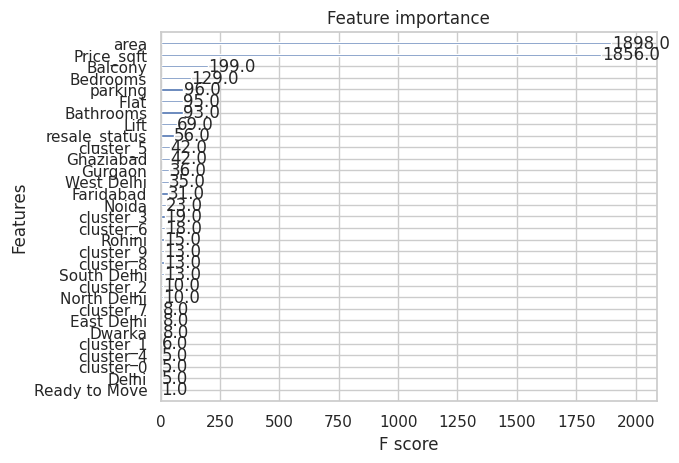

In [104]:
import xgboost as xgb
xgb_model = models["XGBoost"]  # Get the trained XGBoost model
xgb.plot_importance(xgb_model)
plt.show()

In [105]:
model = XGBRegressor();
model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)

In [106]:
temp = X_train.tail(1)
# np.exp(y_train.head(1).values)
val = y_train.tail(1).values.astype('float64')
np.exp(val)

array([4800001.])

In [107]:
sample_input = temp.to_numpy().reshape(1, -1)  # Get 1 sample as NumPy array
log_predicted_price = model.predict(sample_input)  # Predict log price
predicted_price = np.exp(log_predicted_price)  # Convert back to original price scale

print(f"Predicted House Price: ₹{predicted_price[0]:,.2f}")

Predicted House Price: ₹4,796,953.00


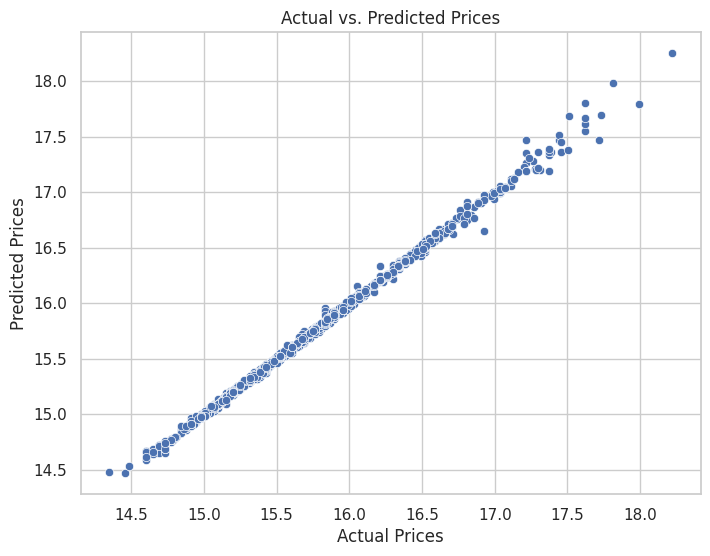

In [109]:

# Visualizing Predictions vs. Actual Prices
y_pred = model.predict(X_test)
plt.figure(figsize=(8,6))
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Prices")
plt.ylabel("Predicted Prices")
plt.title("Actual vs. Predicted Prices")
plt.show()
